# Convolutional Neural Networks (CNN)
<br>Content: 
* [Loading the Data Set](#1)
* [Normalization, Reshape and Label Encoding ](#2)
* [Train Test Split](#3)
* [Convolutional Neural Network](#4)
    * [What is Convolution Operation?](#5)
    * [Same Padding](#6)
    * [Max Pooling](#7)
    * [Flattening](#8)
    * [Full Connection](#9)
* [Implementing with Keras](#10)
    * [Create Model](#11)
    * [Define Optimizer](#12)
    * [Compile Model](#13)
    * [Epochs and Batch Size](#14)
    * [Data Augmentation](#15)
    * [Fit the Model](#16)
    * [Evaluate the Model](#17)
    * [Save and Load the model](#18)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # type: ignore # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
dataset_path="CNN"
print(os.listdir(dataset_path))

# Any results you write to the current directory are saved as output.

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'CNN'

In [29]:
#pip install pandas

<a id="1"></a>
## Loading the Data Set
* In this part we load and visualize the data.

In [26]:
# read train 
train = pd.read_csv(dataset_path+"train.csv")
print(train.shape)
train.head()

FileNotFoundError: [Errno 2] No such file or directory: '/..train.csv'

In [5]:
# read test 
test= pd.read_csv(dataset_path+"test.csv")
print(test.shape)
test.head()

NameError: name 'dataset_path' is not defined

In [69]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 
# X_train=train.iloc[:,1:]

c:\Users\AL-MONTHER-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

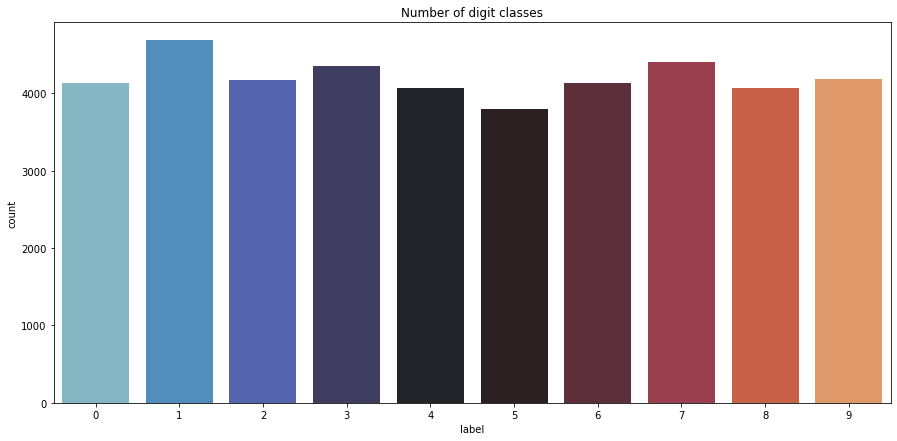

In [70]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

In [28]:
# plot some samples
img = X_train.iloc[5].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

NameError: name 'X_train' is not defined

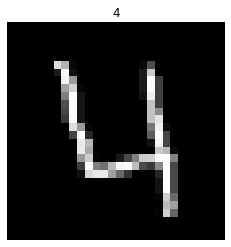

In [72]:
# plot some samples
img = X_train.iloc[3].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

<a id="2"></a>
## Normalization, Reshape and Label Encoding 
* Normalization
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* Reshape
    * Train and test images (28 x 28) 
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel. 
* Label Encoding  
    * Encode labels to one hot vectors 
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

In [73]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [74]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [76]:
Y_train.shape


(42000,)

In [77]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)
Y_train.shape

(42000, 10)

In [78]:
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

<a id="3"></a>
## Train Test Split
* We split the data into train and test sets.
* test size is 10%.
* train size is 90%.

In [80]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (34020, 28, 28, 1)
x_test shape (3780, 28, 28, 1)
y_train shape (34020, 10)
y_test shape (3780, 10)


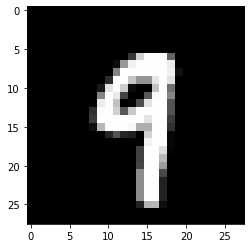

In [36]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

<a id="4"></a>
## Convolutional Neural Network 
* CNN is used for image classification, object detection 
* <a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

<a id="5"></a>
### What is Convolution Operation?
* We have some image and feature detector(3*3)
* Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
* Feature detector = kernel = filter
* Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
* feature map = conv(input image, feature detector). Element wise multiplication of matrices.
* feature map = convolved feature
* Stride = navigating in input image.
* We reduce the size of image. This is important because code runs faster. 
* We create multiple feature maps because we use multiple feature detectors(filters).
<a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>


* After having convolution layer we use ReLU to break up linearity.


<a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

<a id="6"></a>
### Same Padding
* As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
* input size and output size are same.
* <a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>

<a id="7"></a>
### Max Pooling
* It makes down-sampling or sub-sampling (Reduces the number of parameters)
* It makes the detection of features invariant to scale or orientation changes.
* It reduce the amount of parameters and computation in the network, and hence to also control overfitting. 
* <a href="https://ibb.co/ckTjN9"><img src="https://preview.ibb.co/gsNYFU/maxpool.jpg" alt="maxpool" border="0"></a>

<a id="8"></a>
### Flattening
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/c7eVvU/flattenigng.jpg" alt="flattenigng" border="0"></a>

<a id="9"></a>
### Full Connection
* Neurons in a fully connected layer have connections to all activations in the previous layer
* Artificial Neural Network
* <a href="https://ibb.co/hsS14p"><img src="https://preview.ibb.co/evzsAU/fullyc.jpg" alt="fullyc" border="0"></a>

<a id="10"></a>
## Implementing with Keras

<a id="11"></a>
### Create Model
* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
* Dropout: Dropout is a technique where randomly selected neurons are ignored during training
* <a href="https://ibb.co/jGcvVU"><img src="https://preview.ibb.co/e7yPPp/dropout.jpg" alt="dropout" border="0"></a>

In [87]:
# 
from sklearn.metrics import confusion_matrix,accuracy_score
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [88]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 14, 14, 8)         0         
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 7, 7, 16)         

#### Another way to build cnn model

In [89]:
# # import keras
# from tensorflow import keras
# inputs = keras.Input(shape=(28,28,1))

# x=keras.layers.Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu')(inputs)
# x=keras.layers.MaxPool2D(pool_size=(2,2))(x)
# x=keras.layers.Dropout(0.25)(x)
# #
# x=keras.layers.Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu')(x)
# x=keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
# x=keras.layers.Dropout(0.25)(x)
# # fully connected
# x=keras.layers.Flatten()(x)
# x=keras.layers.Dense(256, activation = "relu")(x)
# x=keras.layers.Dropout(0.5)(x)
# outputs=keras.layers.Dense(10, activation = "softmax")(x)
# model2 = keras.Model(inputs=inputs, outputs=outputs)
# model2.summary()

<a id="13"></a>
### Compile Model
* categorical crossentropy
* We make binary cross entropy at previous parts and in machine learning tutorial
* At this time we use categorical crossentropy. That means that we have multi class.
 <a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>
* Adam optimizer: Change the learning rate


In [90]:
# Compile the model
#optimizer may be 'adam'
# loss may be "categorical_crossentropy", "binary_crossentropy","sparse_categorical_crossentropy": when the class is one column
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

<a id="14"></a>
### Epochs and Batch Size
* Say you have a dataset of 10 examples (or samples). You have a **batch size** of 2, and you've specified you want the algorithm to run for 3 **epochs**. Therefore, in each epoch, you have 5 **batches** (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations **per epoch**.

In [92]:
epochs = 10  # for better result increase the epochs
batch_size = 250

<a id="15"></a>
### Data Augmentation
* To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
* Alter the training data with small transformations to reproduce the variations of digit.
* For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.
* <a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>
    


In [93]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False
        )  # randomly flip images

datagen.fit(X_train)

<a id="16"></a>
### Fit the model

In [43]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 22s 137ms/step - loss: 1.1824 - accuracy: 0.6040 - val_loss: 0.2637 - val_accuracy: 0.9290
Epoch 2/10
151/151 [==============================] - 21s 141ms/step - loss: 0.4925 - accuracy: 0.8435 - val_loss: 0.1483 - val_accuracy: 0.9602
Epoch 3/10
151/151 [==============================] - 23s 151ms/step - loss: 0.3472 - accuracy: 0.8919 - val_loss: 0.1132 - val_accuracy: 0.9679
Epoch 4/10
151/151 [==============================] - 23s 153ms/step - loss: 0.2871 - accuracy: 0.9109 - val_loss: 0.0951 - val_accuracy: 0.9726
Epoch 5/10
151/151 [==============================] - 23s 149ms/step - loss: 0.2580 - accuracy: 0.9194 - val_loss: 0.0794 - val_accuracy: 0.9767
Epoch 6/10
151/151 [==============================] - 23s 155ms/step - loss: 0.2271 - accuracy: 0.9291 - val_loss: 0.0708 - val_accuracy: 0.9779
Epoch 7/10
151/151 [==============================] - 23s 154ms/step - loss: 0.2088 - accuracy: 0.9372 - val_loss: 0.0647 - val_ac

<a id="17"></a>
### Evaluate the model
* Train and Test Loss visualization
* Confusion matrix
* Accuracy Score


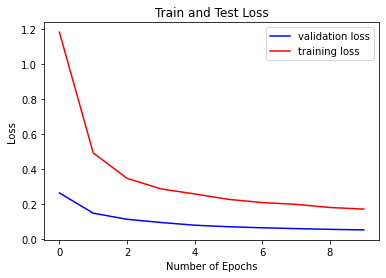

In [44]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.plot(history.history['loss'], color='r', label="training loss")
plt.title("Train and Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [96]:
Y_pred[0],Y_pred_classes[0]

(array([7.8176217e-06, 7.1202511e-10, 2.8636766e-09, 4.1234249e-10,
        1.1076018e-09, 6.2048799e-05, 9.9992776e-01, 9.6669081e-13,
        2.2430863e-06, 3.5537620e-09], dtype=float32),
 6)

132/132 [==============================] - 1s 6ms/step


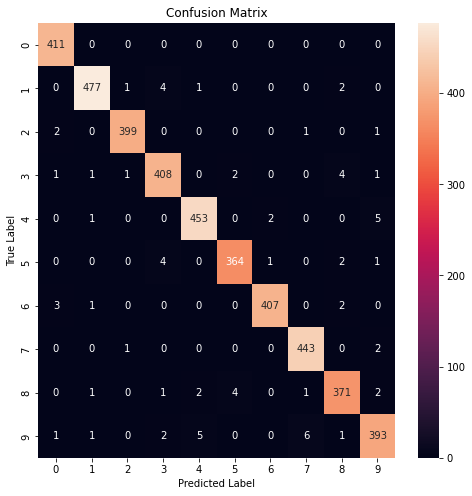

In [54]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors 
Y_true = np.argmax(Y_val,axis = 1) 
# if we use one column for label we don't need to np.argmax(Y_Val,axis=1)
# Y_true = Y_val
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, fmt= 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [55]:
accuracy_score(Y_true, Y_pred_classes)

0.9823809523809524

<a id="18"></a>
### Save and load the trained Model

In [49]:
model.save_weights('8hgyf.h5')

In [53]:
model2.load_weights('model_weights.h5')